<a href="https://colab.research.google.com/github/bmounikareddy98/Machine-learning-assignments/blob/main/part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **CS 6375 Assignment-1, Part_1 : Linear regression using gradient descent**

  **Name of students: **
  Mounika B(MXB210007)
  Saketh Dasavathini(SXD190016)


In [18]:
# importing the required libraries

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


**Importing the dataset from github public repository**

In [19]:
url = 'https://raw.githubusercontent.com/bmounikareddy98/Machine-learning-assignments/main/insurance.csv'
dataset = pd.read_csv(url)

#dataset = dataset.drop_duplicates()
print(dataset.head()) # The top 5 rows of the dataset are printed below to understand about the data

      sex smoker     region  children     bmi  age      charges
0  female    yes  southwest         0  27.900   19  16884.92400
1    male     no  southeast         1  33.770   18   1725.55230
2    male     no  southeast         3  33.000   28   4449.46200
3    male     no  northwest         0  22.705   33  21984.47061
4    male     no  northwest         0  28.880   32   3866.85520


**Data preprocessing where null and duplicate values are checked, categorical data is handled and the data in different columns are normalized and scaled onto one scale**

**Dividing the dataset into independent features array and dependent features array**

In [20]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
print(X.shape) # The size of X(independent features)
print(Y.shape) # The size of Y(dependent features)


(1338, 6)
(1338,)


**The null and duplicate values are checked in the dataset**

In [21]:
print("The number of null values for each feature is:", dataset.isnull().sum())
print("The number of duplicate records in the dataset are :" ,dataset.duplicated().sum())

# The below output shows there are no null values and there is 1 duplicate record

#The duplicate records are removed using the below function
dataset = dataset.drop_duplicates()
print("The number of duplicate records in the dataset after dropping them are :" ,dataset.duplicated().sum())

The number of null values for each feature is: sex         0
smoker      0
region      0
children    0
bmi         0
age         0
charges     0
dtype: int64
The number of duplicate records in the dataset are : 1
The number of duplicate records in the dataset after dropping them are : 0


**Handling the categorical data present in sex, smoker and region columns **

In [23]:
# Performing label encoding on the columns sex, smoker and region 

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
X[:, 1]= labelencoder.fit_transform(X[:, 1])
X[:, 2]= labelencoder.fit_transform(X[:, 2])
print(X)  # The first three columns are as below after performing label encoding

[[0 1 3 0 27.9 19]
 [1 0 2 1 33.77 18]
 [1 0 2 3 33.0 28]
 ...
 [0 0 2 0 36.85 18]
 [0 0 3 0 25.8 21]
 [0 1 1 0 29.07 61]]


In [24]:
# Performing one hot encoding on the columns sex, smoker and region to avoid the hierarchy of order in the values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


print(X[0]) # Printing the first recording showing how the one hot encoding occured and size of the array increased


[1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0 27.9 19]


**Splitting the training and test sets**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1) # The training set is 80% and test set is 20%

In [26]:
#Printing the size of the training and test tests after splitting
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1070, 11)
(1070,)
(268, 11)
(268,)


**The values in the columns children, bmi, age and charges are normalized and scaled**

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[:, 8:11] = sc.fit_transform(X_train[:, 8:11])
X_test[:, 8:11] = sc.transform(X_test[:, 8:11])
Y_train = Y_train.reshape(-1, 1)
Y_train = sc.fit_transform(Y_train)
Y_test = Y_test.reshape(-1, 1)
Y_test = sc.fit_transform(Y_test)

# The values in training and test sets after normalizing
print(X_train[0])
print(X_test[0])
print(Y_train[0])
print(Y_test[0])


[1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 -0.9070577122378711 -0.6647447195470174
 1.0022862943641633]
[0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 -0.9070577122378711 0.7937285808383426
 -1.4326502925452371]
[-0.23802019]
[-0.96453518]


**The data preprocessing is ended above**

**Defining the cost function/error function**

In [28]:
def  cal_cost(theta,X,Y):
    #theta is weight vector 
   
    m = len(Y)  #number of rows/records
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-Y)) # formula of cost function
    return cost

**Defining the gradient descent function**

In [29]:
def gradient_descent(X,Y,theta,learning_rate=0.01,iterations=1000):
    
    #X    = Matrix of X(independent variables) with added bias units
    # y    = Vector of Y(the dependent variable)
    #theta=Vector of weights 
    #iterations = no of iterations
    #Returns the final weight vector and array of cost history over no of iterations
    
    m = len(Y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,12))
    cost_history_test = np.zeros(iterations)
    theta_history_test = np.zeros((iterations,12))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - Y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,Y)
        
    return theta, cost_history, theta_history


Starting with 1000 iterations and a learning rate of 0.01. Starting with theta from a Gaussian distribution 

In [30]:
lr =0.01
n_iter = 1000

theta = np.random.randn(12,1)

X_b = np.c_[np.ones((len(X_train),1)),X_train] # appending the column of ones(X0) to X_train
theta,cost_history,theta_history = gradient_descent(X_b,Y_train,theta,lr,n_iter) # calculating the weights, cost history(mean squared error)

# Finding the predicted value given by the hypothesis learnt for training data
sum=theta[0][0]
y_pred= np.ones(Y_train.shape)
for i in range(0, X_train.shape[0]):
  sum+= theta[1][0]*X_train[i][0]+theta[2][0]*X_train[i][1]+theta[3][0]*X_train[i][2]+theta[4][0]*X_train[i][3]+theta[5][0]*X_train[i][4]+theta[6][0]*X_train[i][5]+theta[7][0]*X_train[i][6]+theta[8][0]*X_train[i][7]+theta[9][0]*X_train[i][8]+theta[10][0]*X_train[i][9]+theta[11][0]*X_train[i][10]
  y_pred[i][0]=sum;
  sum=theta[0][0]

# Finding the predicted value given by the hypothesis learnt for test data

theta_test = np.random.randn(12,1)
X_b_test = np.c_[np.ones((len(X_test),1)),X_test]
theta_test,cost_history_test,theta_history_test = gradient_descent(X_b_test,Y_test,theta_test,lr,n_iter)

sum_test=theta_test[0][0]
y_test_pred= np.ones(Y_test.shape)
for i in range(0, X_test.shape[0]):
  sum_test+= theta_test[1][0]*X_test[i][0]+theta_test[2][0]*X_test[i][1]+theta_test[3][0]*X_test[i][2]+theta_test[4][0]*X_test[i][3]+theta_test[5][0]*X_test[i][4]+theta_test[6][0]*X_test[i][5]+theta_test[7][0]*X_test[i][6]+theta_test[8][0]*X_test[i][7]+theta_test[9][0]*X_test[i][8]+theta_test[10][0]*X_test[i][9]+theta_test[11][0]*X_test[i][10]
  y_test_pred[i][0]=sum_test;
  sum_test=theta_test[0][0]





**Plotting the graph between mean squared error and number of iterations. The plot is almost straight at 380 iterations.**

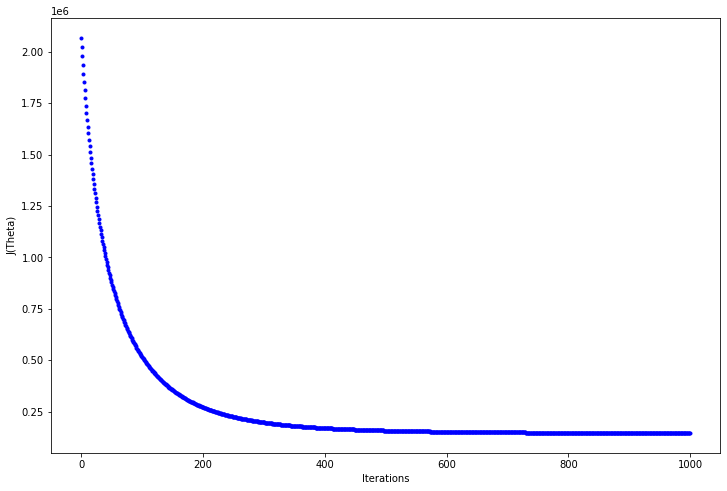

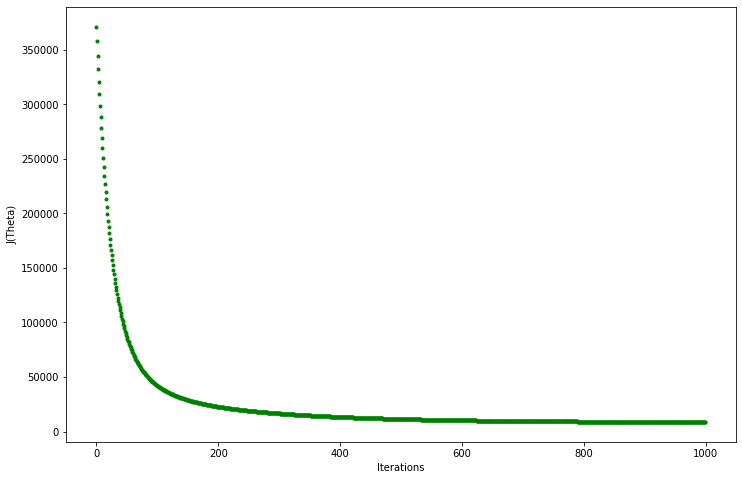

In [32]:
n_iter=1000
# plot between mse and number of iterations for training set
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')


# plot between mse and number of iterations for test set
fig,ax = plt.subplots(figsize=(12,8))                  
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history_test,'g.')


**Plotting the graph with 380 iterations**

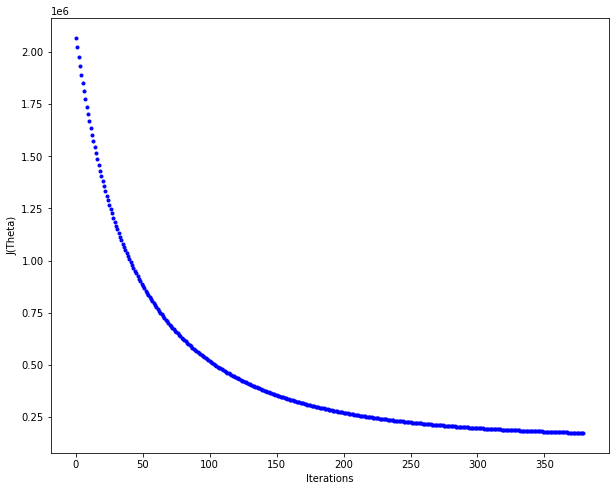

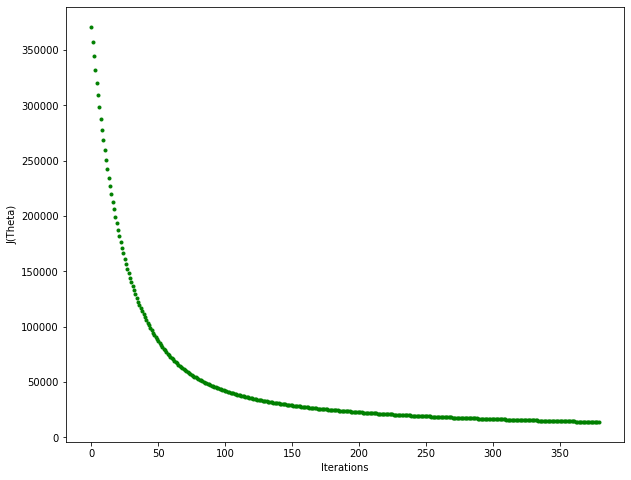

In [33]:
# Plotting the graph between mse and number of iterations for training dataset
fig,ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(380),cost_history[:380],'b.')

# Plotting the graph between mse and number of iterations for training dataset
fig,ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(380),cost_history_test[:380],'g.')

**Finding the root mean squared error and R squared values**

In [34]:
import sklearn.metrics
import math

# Finding rmse and r2 for training data
mse = sklearn.metrics.mean_squared_error(Y_train, y_pred)
rmse = math.sqrt(mse)
r2t = r2_score(Y_train, y_pred)
print(rmse)
print(r2t)

# Finding rmse and r2 for test data
mse_test = sklearn.metrics.mean_squared_error(Y_test, y_test_pred)
rmse_test = math.sqrt(mse_test)
r2t_test = r2_score(Y_test, y_test_pred)
print(rmse_test)
print(r2t_test)



0.5036921452838776
0.7462942227793252
0.49212552281170313
0.7578124697973079


**Scatter plots with regression line**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


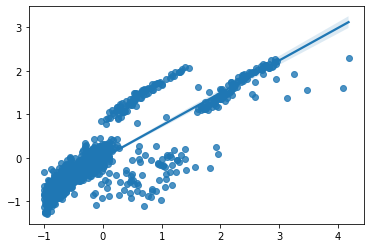

In [35]:
# Scatter plot for training data
import seaborn as sns

#create scatterplot with regression line
sns.regplot(Y_train, y_pred)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


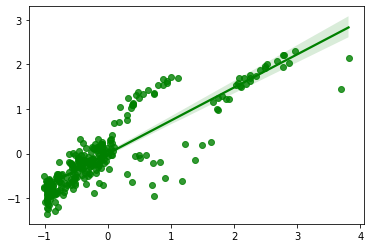

In [36]:
# Scatter plot for test data
sns.regplot(Y_test, y_test_pred, color='green')